In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
n_bact = 1
time = 1e5
steps = time*1e3
dt = time/steps
save_intervall = 100
n_saves = int(steps/save_intervall)
lam = 0.75
M = 3
folder = "./results/run_id0_{}_{:.0e}_{}_{}/".format(n_bact, int(time),int(lam*100),M)
#folder = "rot_test/"
n_bact = 31
#folder = "run_id0_5_1e+05_45_5/"
time = np.zeros((n_bact,n_saves))
#data_list = [np.genfromtxt("./run_id1_0_1_1e+05/"+"bact_1.csv",skip_header=1,delimiter=",")]
data_list = []
#for file in (os.listdir(path=folder)):
for i in range(n_bact):
    print(i)
    file = "bact_{}.csv".format(i+1)
    data = np.genfromtxt(folder+file, skip_header = 1, delimiter = ",")
    data_list.append(data)
    
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


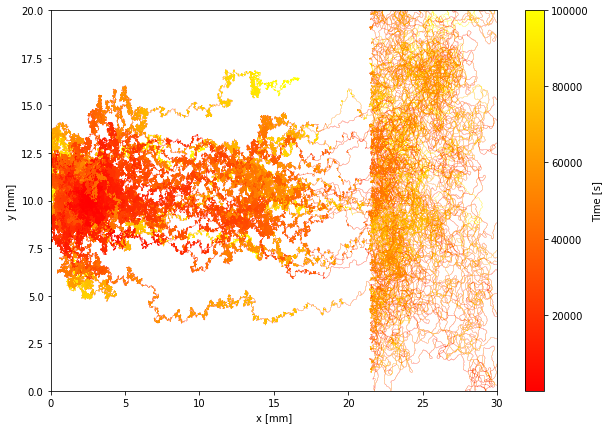

In [3]:
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
fig, axs = plt.subplots(1, 1, sharex=True, sharey=True,figsize=(10,7))

t = data_list[i][:,0]
norm = plt.Normalize(t.min(), t.max())

for i in range(n_bact):
    x = data_list[i][:,1] / 1e3
    y = data_list[i][:,2] / 1e3

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)



# Create a continuous norm to map from data points to colors

    lc = LineCollection(segments, cmap='autumn', norm=norm)
# Set the values used for colormapping
    lc.set_array(t)
    lc.set_linewidth(0.2)
    line = axs.add_collection(lc)
fig.colorbar(line, ax=axs, label="Time [s]")


axs.set_xlim(0,30)
axs.set_ylim(0,20)
axs.set_xlabel("x [mm]")
axs.set_ylabel("y [mm]")
#axs.set_title("$\lambda$ = {} (1/mm),   M = {}".format(lam,M))
#plt.savefig(folder+"traj.pdf")
plt.tight_layout
plt.savefig(folder+"traj.png")
plt.show()

In [4]:
def gradient(x):
    grad_x0 = lam*1e-3
    grad_x1 = 0.001
    grad_x2 = -2500
    grad_x3 = 0
    return grad_x1*np.exp(grad_x0*(x+grad_x2)) + grad_x3



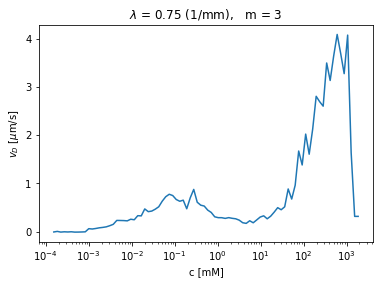

In [6]:
# posx vs velx
posx_max = 22000
posx_bin_width = 250
bins = int(posx_max / posx_bin_width)

posx_bins = np.arange(0,posx_max,posx_bin_width)
velx_bins = np.zeros(bins)
count_bins = np.zeros(bins)
for i in range(n_bact):
    posx = data_list[i][:,1]
    velx = data_list[i][:,3]
    for j in range(len(posx)):
        if (posx[j] < posx_max):
            currbin = int(posx[j] / posx_bin_width)
            count_bins[currbin] += 1
            velx_bins[currbin] += velx[j]
        

min_count = 1000
velx_bins[count_bins>min_count] /= (count_bins[count_bins>min_count])
c_bins = gradient(posx_bins)
#plt.plot(posx_bins[count_bins>100],velx_bins[count_bins>100])   
plt.plot(c_bins[count_bins>min_count],velx_bins[count_bins>min_count])   
plt.xscale("log")
#plt.ylim(0,3)
plt.xlabel("c [mM]")
plt.ylabel("$v_D$ [$\mu$m/s]")
plt.xlim(None,None)
plt.title("$\lambda$ = {} (1/mm),   m = {}".format(lam,M))
plt.savefig(folder+"posx_velx.pdf")
plt.show()

In [ ]:
num = 5
index1 = 0
index2 = 9

x = data_list[num][:,index1]
y = data_list[num][:,index2]
plt.plot(x,y)
#plt.xlim(0,0.0005)
#plt.savefig("yp_l_old.png")
plt.show()

In [ ]:
# all trajectories
for i in range(n_bact):
    time = data_list[i][:,9]
    posx = data_list[i][:,7]

    #plt.ylim(2.65,2.675)
    #plt.ylim(1.89,1.92)
    #plt.ylim(2400,2600)
    #plt.yscale("log")
    #posy = data_list[i][:,2]
    plt.plot(time,posx,lw=1)
    plt.xscale("log")
    plt.savefig(folder+"c_m.png")
    #plt.xlim(0,2e4)
    #plt.xlim(0,3e4)
    #plt.ylim(0,2e4)
    #plt.ylim(100,5000)
    #plt.ylim(8,12)
    #plt.xscale("log")
    #plt.xlim(0,3e4)
    #plt.ylim(0,2e4)
    #plt.xlabel("t [s]")
    #plt.ylabel("y [µm]")
    #plt.savefig(folder+"traj_all.png")
    #plt.savefig("a3.png")

In [ ]:
bac = 3
x = data_list[bac][:,1]
y = data_list[bac][:,2]
count = 0
for i in range(len(y)):
    if y[i] == 0:
        count+= 1
        
print(count / len(y))
#xl = 14810
#yl = 8e7
#plt.plot([xl,xl],[0,yl],lw = 1)
#plt.ylim(0,2e4)
#plt.xlim(0,3e4)
plt.plot(x,y,color="black",lw=0.7)
plt.xlim(0,1.2e4)
plt.ylim(0.25e4,1.75e4)
plt.xlabel("x [µm]")
plt.ylabel("y [µm]")
plt.savefig("bact4_zoom.png")
plt.show()

In [ ]:
i = 0
posx = data_list[i][:,1]
velx = data_list[i][:,3]
posx_offset = np.delete(posx, 0)

dx = posx - posx_offset
print(posx)
print(posx_offset)

#for i in range(n_bact):
    #posx = data_list[i][:,1]
    #velx = data_list[i][:,3]
    #posx_offset = posx.pop(0)
    #posx_offset.append(posx[-1])
    #dx = posx - posx_offset
        
        

In [ ]:
# avg value over time 
index = 1
#val_max = 30000
time_max = 100000
bin_width = 10
bins = int(time_max / bin_width)

val_bins = np.zeros(bins)
time_bins = np.arange(0,time_max,bin_width)
count_bins = np.zeros(bins)
for i in range(n_bact):
    val_list = data_list[i][:,index]
    time_bins_list = data_list[i][:,0]
    for j in range(len(val_list)):
        curr_bin = int(time_bins_list[j]/bin_width)
        if (curr_bin<bins): 
            count_bins[curr_bin] += 1
            val_bins[curr_bin] += val_list[j]
        

min_count = 1000

val_bins[count_bins>min_count] /= (count_bins[count_bins>min_count])
plt.plot(time_bins[count_bins>min_count],val_bins[count_bins>min_count])
#plt.xlim(16e3,17500)
plt.ylim(0,3.1e4)
plt.xlim(0,1e5)
plt.xlabel("Time [s]")
plt.ylabel("Avg. x [µm]")
plt.savefig(folder+"avg_posx.png")
plt.show()
           